## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Importing Data

In [4]:
Dataframe = pd.read_csv("D:\\Jayesh\\Git\\GitHub repos\\Electric-Motor-Temperature-Prediction\\Dataset.csv") # write the path to your dataset here
Dataframe

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


## Feature explaination

**1. u_q** : Voltage q-component measurement in dq-coordinates (in V)

**2. coolant** : Coolant temperature (in °C)

**3. stator_winding** : Stator winding temperature (in °C) measured with thermocouples

**4. u_d** : Voltage d-component measurement in dq-coordinates

**5. stator_tooth** : Stator tooth temperature (in °C) measured with thermocouples

**6. motor_speed** : Motor speed (in rpm)

**7. i_d** : Current d-component measurement in dq-coordinates

**8. i_q** : Current q-component measurement in dq-coordinates

**9. pm** : Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly

**10. stator_yoke** : Stator yoke temperature (in °C) measured with thermocouples

**11. ambient** : Ambient temperature (in °C)

**12. torque** : Motor torque (in Nm)

**13. profile_id** : Measurement session id. Each distinct measurement session can be identified through this integer

## Bar chart plotting

In [4]:
profile_ids = Dataframe['profile_id'].unique()
profile_ids

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

In [5]:
from matplotlib.cm import get_cmap

counts = Dataframe['profile_id'].value_counts().sort_values(ascending=True)
cmap = get_cmap('cool')
colors = [cmap(i / len(counts)) for i in range(len(counts))]

C:\Users\jayesh\AppData\Local\Temp\ipykernel_1032\1264268654.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('cool')


<Axes: xlabel='profile_id'>

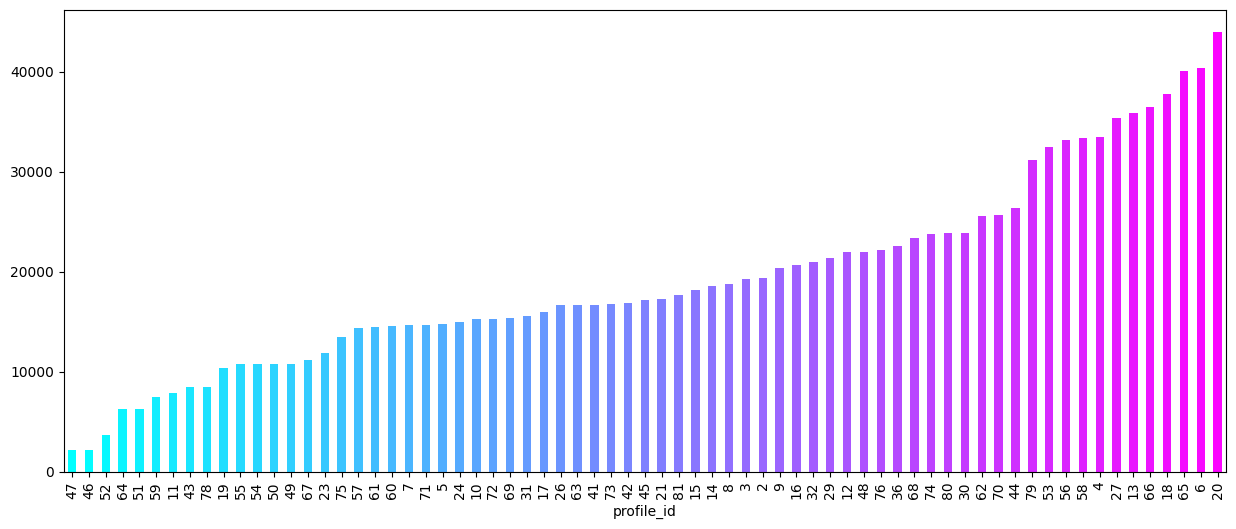

In [6]:
Dataframe['profile_id'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize=(15, 6), color=colors)

## Box plotting

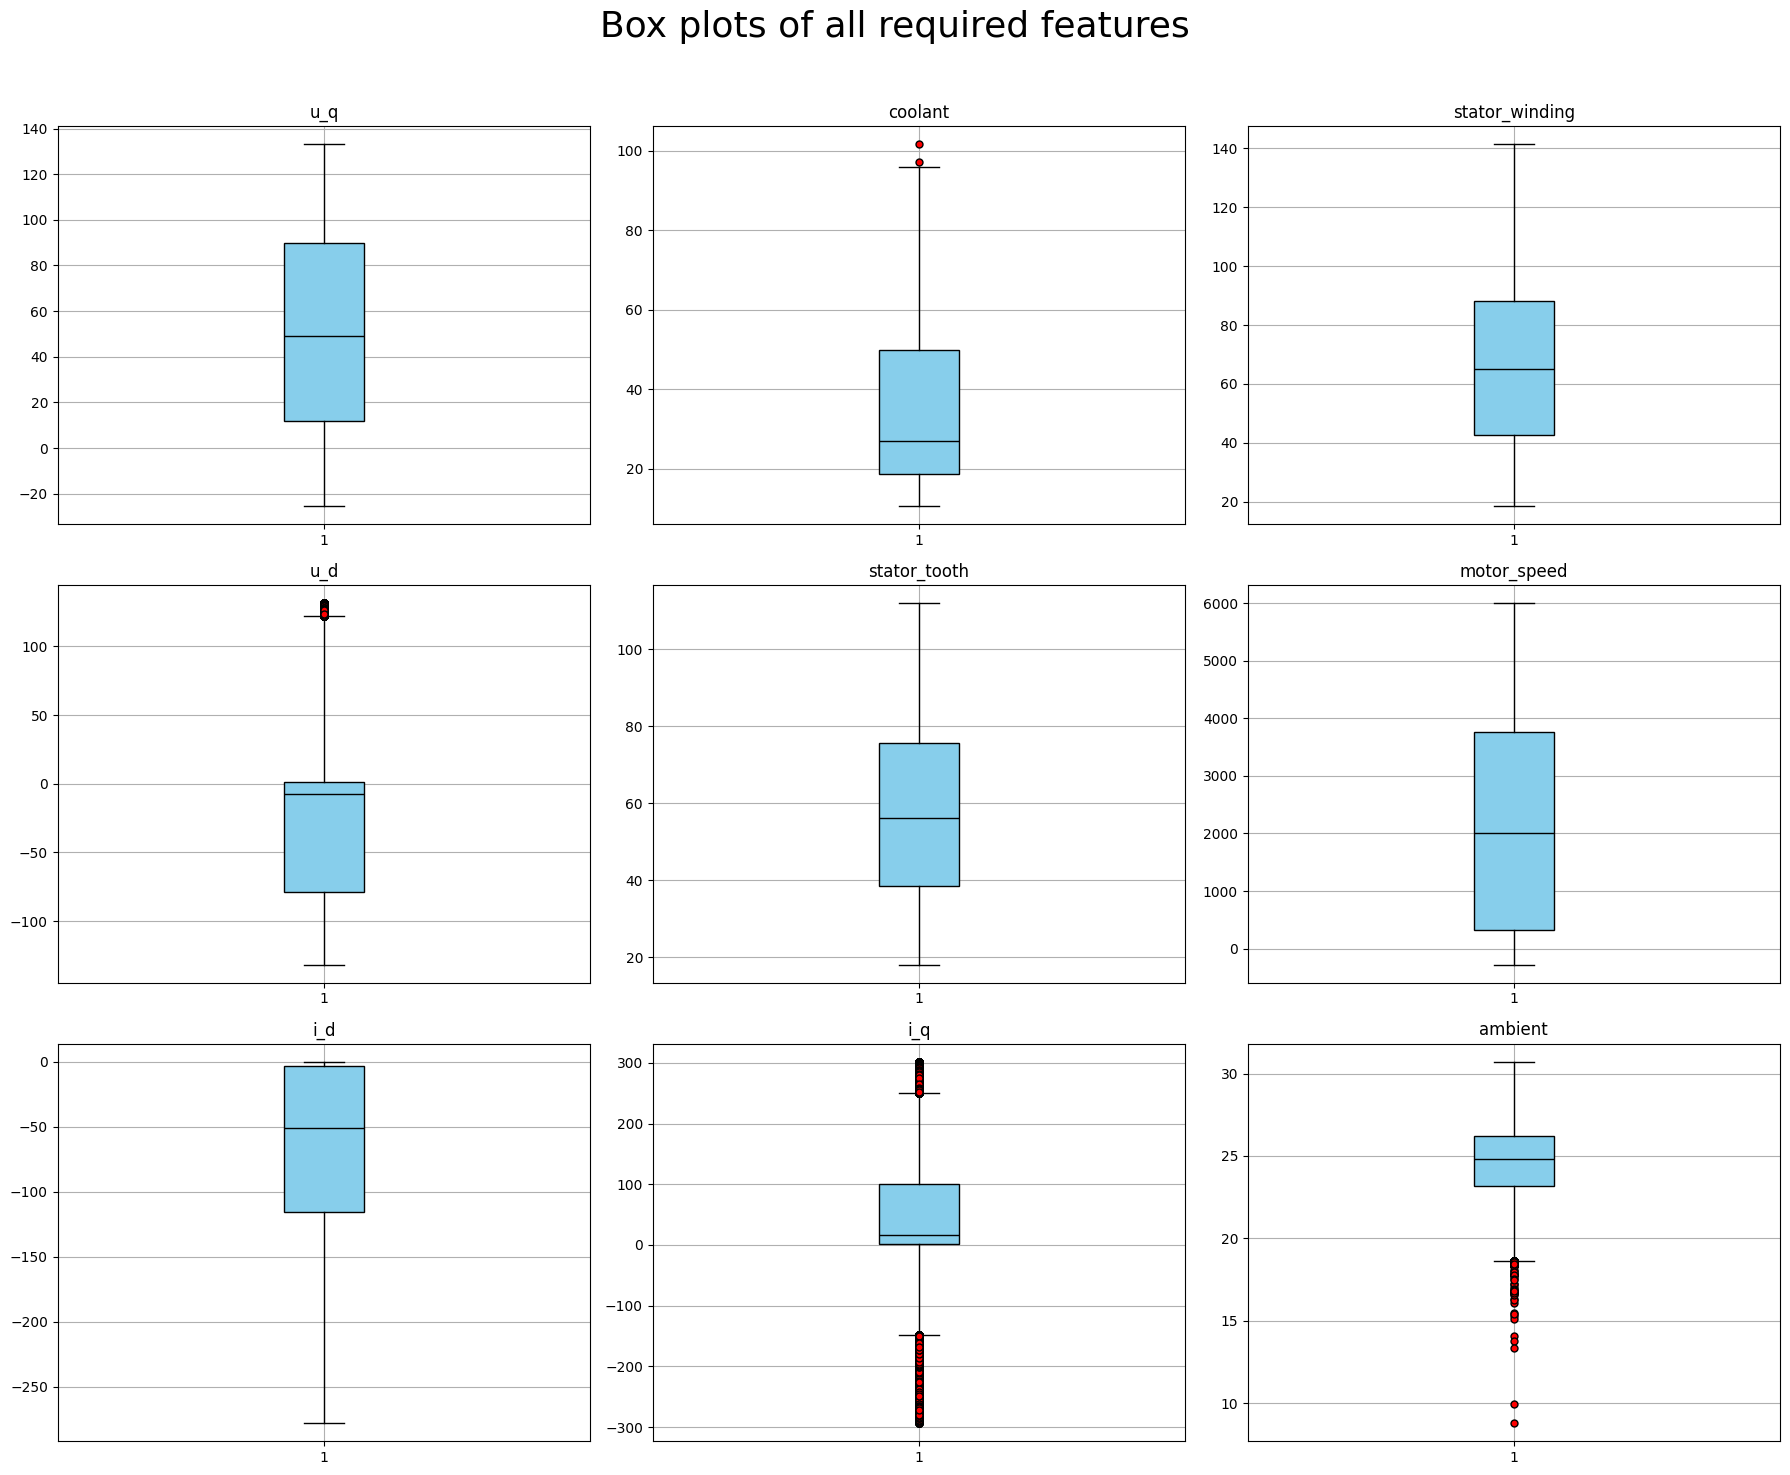

In [7]:
features_box_plot = ['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 'motor_speed', 'i_d', 'i_q', 'ambient']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
plt.suptitle('Box plots of all required features', fontsize=26)

for i, feature in enumerate(features_box_plot):
    axes[i // 3, i % 3].boxplot(Dataframe[feature],
                                patch_artist=True, 
                                boxprops=dict(facecolor='skyblue', color='black'),
                                capprops=dict(color='black'),
                                whiskerprops=dict(color='black'),
                                flierprops=dict(markerfacecolor='red', marker='o', markersize=5),
                                medianprops=dict(color='black'))
    axes[i // 3, i % 3].set_title(feature)
    axes[i // 3, i % 3].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0] 

In [9]:
print(f"Outliers in u_d: {count_outliers(Dataframe, 'u_d')}, Outlier percentage: {(count_outliers(Dataframe, 'u_d') / Dataframe['u_d'].value_counts().sum()) * 100:.2f}%")
print(f"Outliers in i_d: {count_outliers(Dataframe, 'i_q')}, Outlier percentage: {(count_outliers(Dataframe, 'i_q') / Dataframe['i_q'].value_counts().sum()) * 100:.2f}%")
print(f"Outliers in ambient: {count_outliers(Dataframe, 'ambient')}, outlier percentage: {(count_outliers(Dataframe, 'ambient') / Dataframe['ambient'].value_counts().sum()) * 100:.2f}%")

Outliers in u_d: 18872, Outlier percentage: 1.42%
Outliers in i_d: 65631, Outlier percentage: 4.93%
Outliers in ambient: 259, outlier percentage: 0.02%


# Histogram plotting

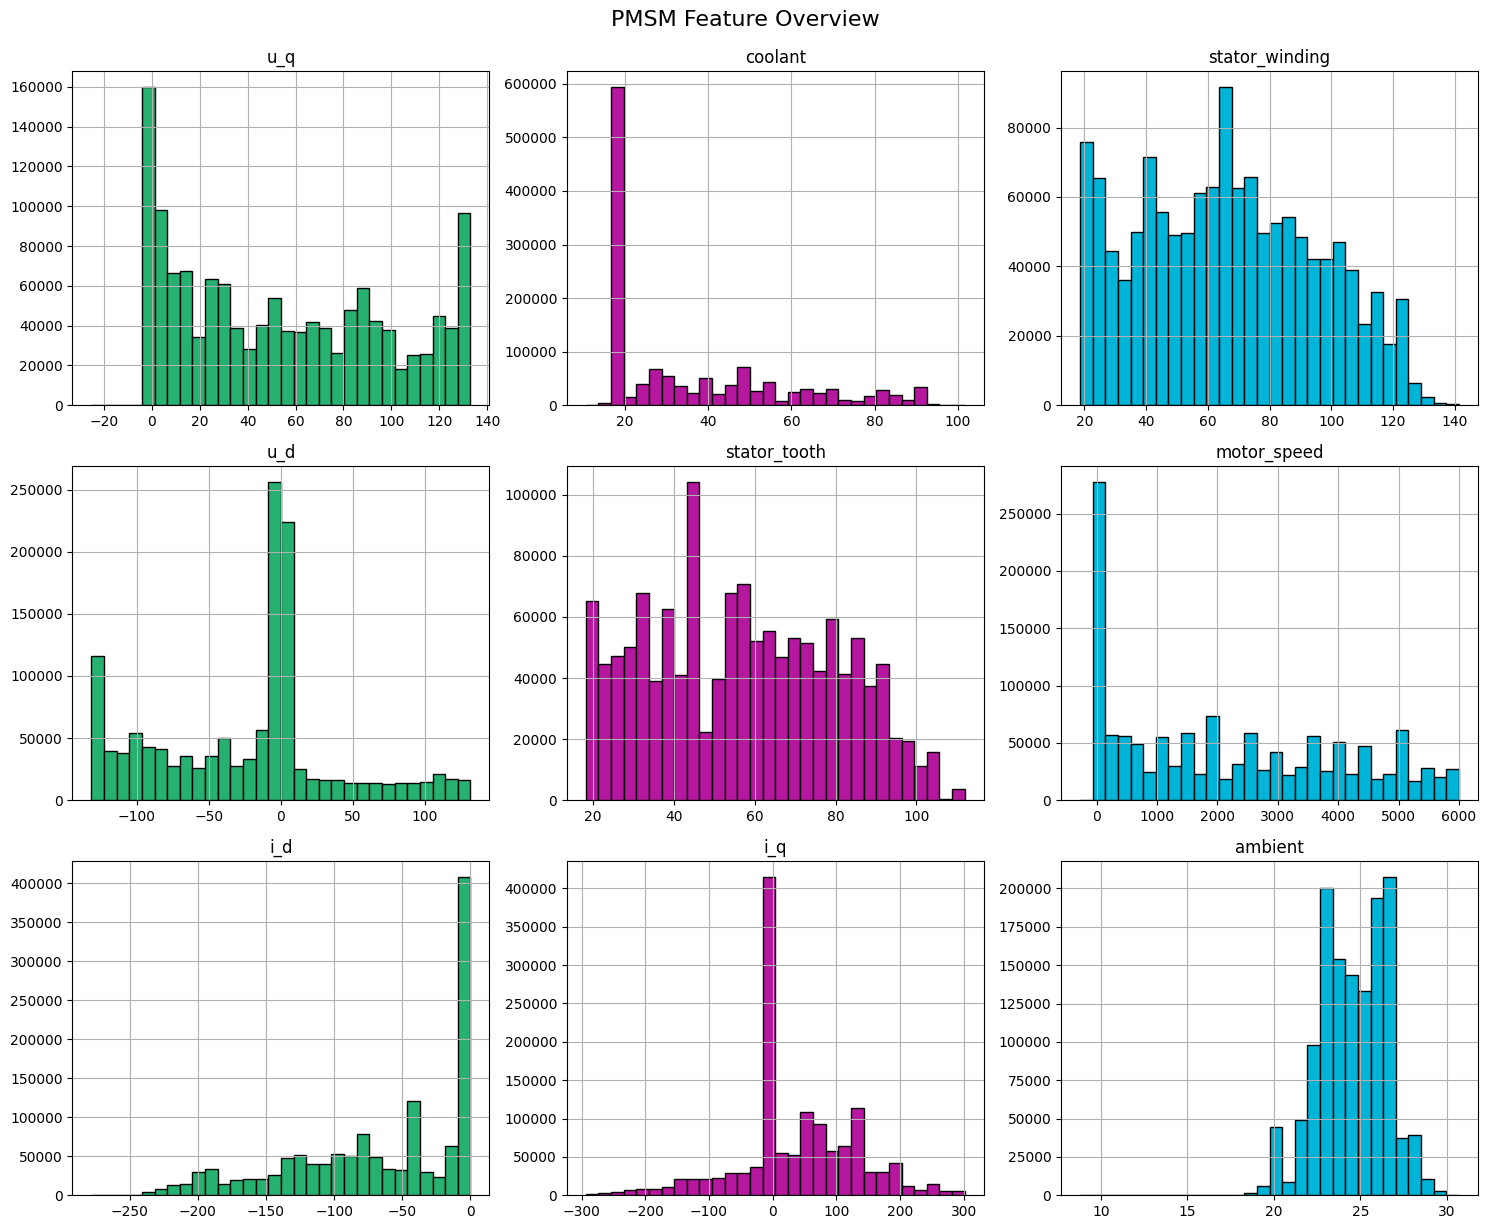

In [10]:
features_hist_plot = ['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 'motor_speed', 'i_d', 'i_q', 'ambient']
color_list = ['#26b170', '#b5179e', '#00b4d8']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features_hist_plot):
    axes[i].hist(Dataframe[feature], bins=30, color=color_list[i%3], edgecolor='black')
    axes[i].set_title(feature)
    axes[i].grid(True)

fig.tight_layout()
fig.suptitle('PMSM Feature Overview', fontsize=16, y=1.02)
plt.show()

## Scatter plot

In [11]:
features_scatter_plot = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient']

features_scatter_plot1 = ['coolant', 'ambient'] # temprature related features
features_scatter_plot2 = ['u_q', 'u_d', 'i_d', 'i_q'] # electrical features
features_scatter_plot3 = ['motor_speed'] # motor speed

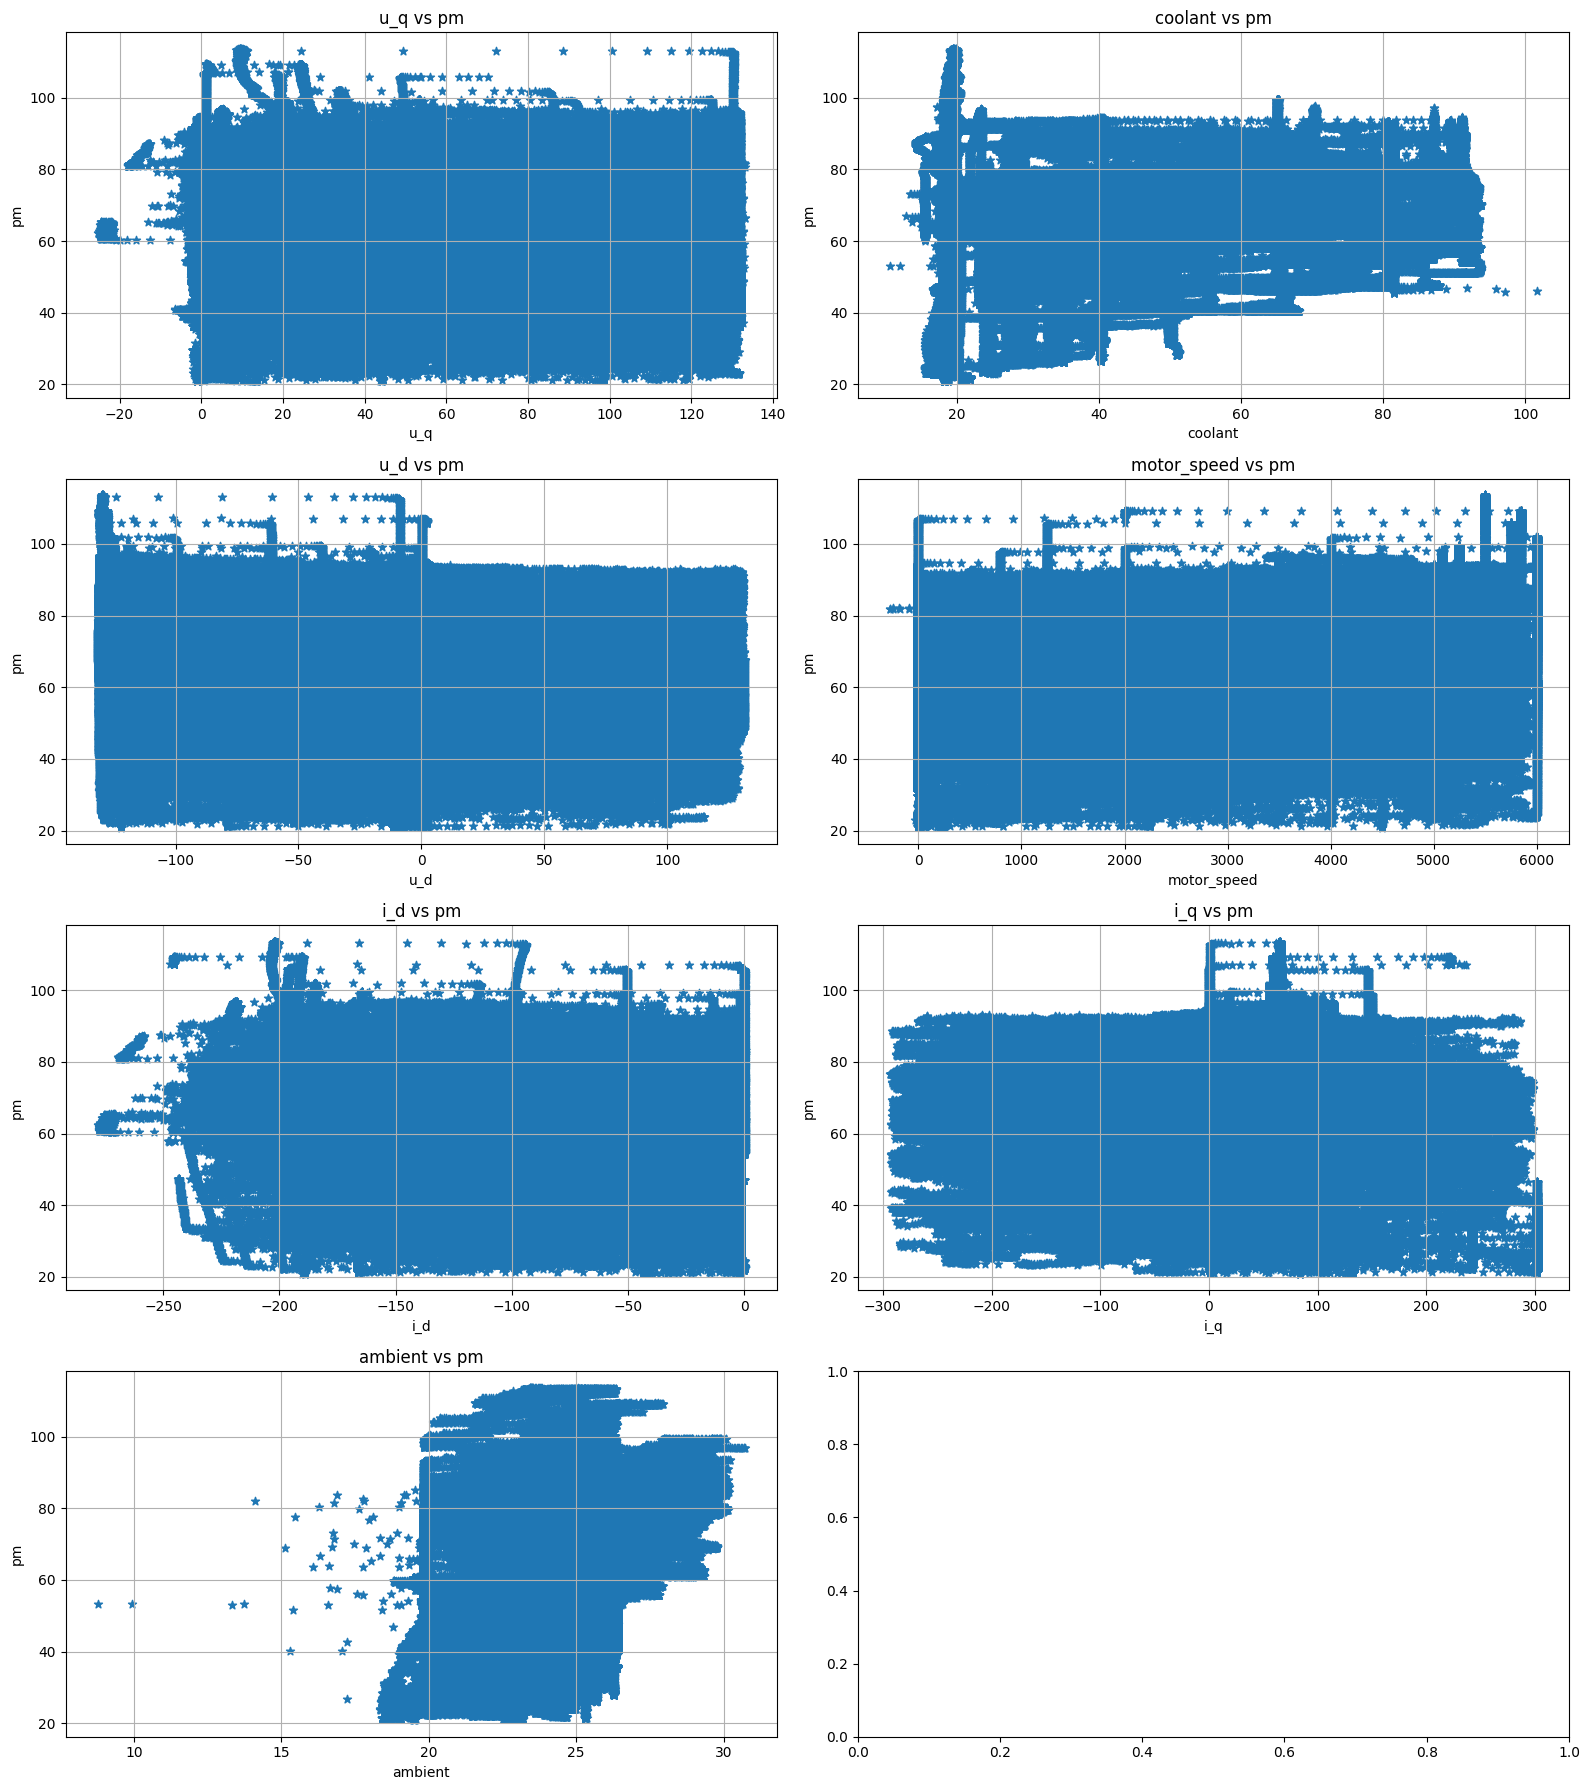

In [19]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axis = axis.flatten()

for i, feature in enumerate(features_scatter_plot):
    axis[i].scatter(Dataframe[feature], Dataframe['pm'], marker='*')
    axis[i].set_title(f'{feature} vs pm')
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel('pm')
    axis[i].grid(True)

for j in range(len(features_scatter_plot), len(axes)):
    axis[j].axis('off')

plt.tight_layout()
plt.show()

## Heatmap for correlation matrix

<Axes: >

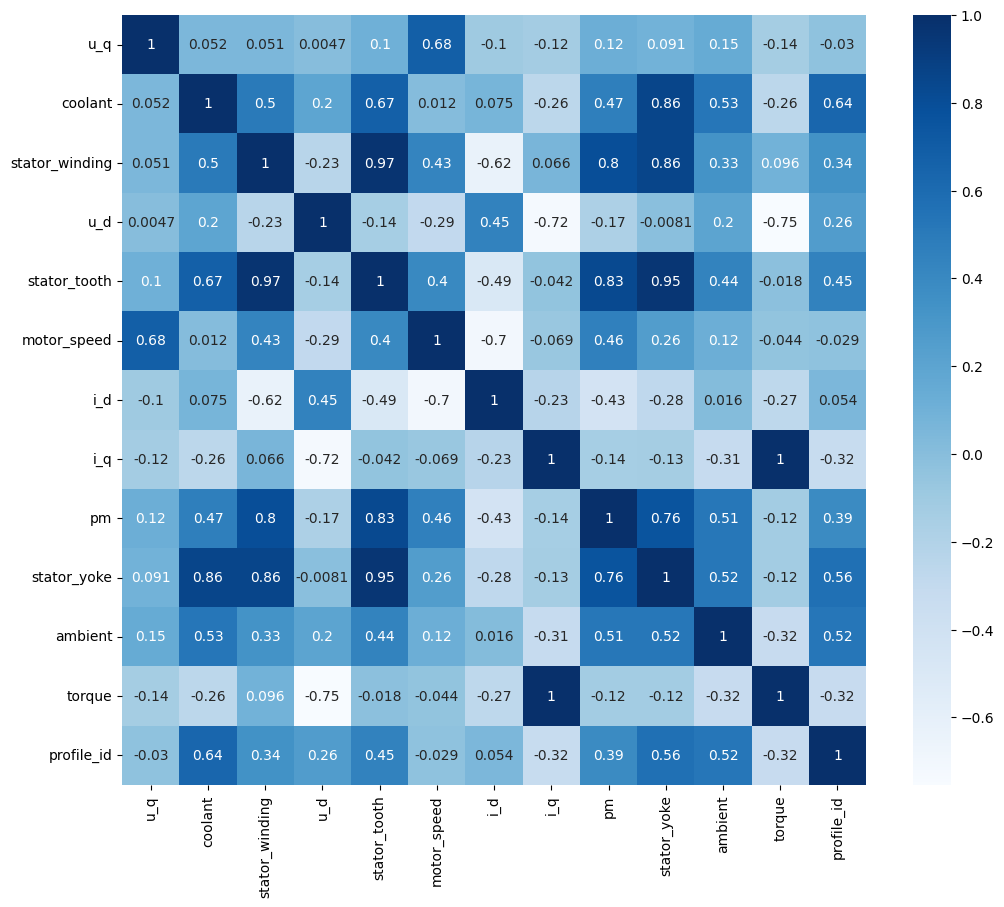

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(Dataframe.corr(), annot=True, cmap='Blues')

## Line chart for top 3 profile ids having most observations.

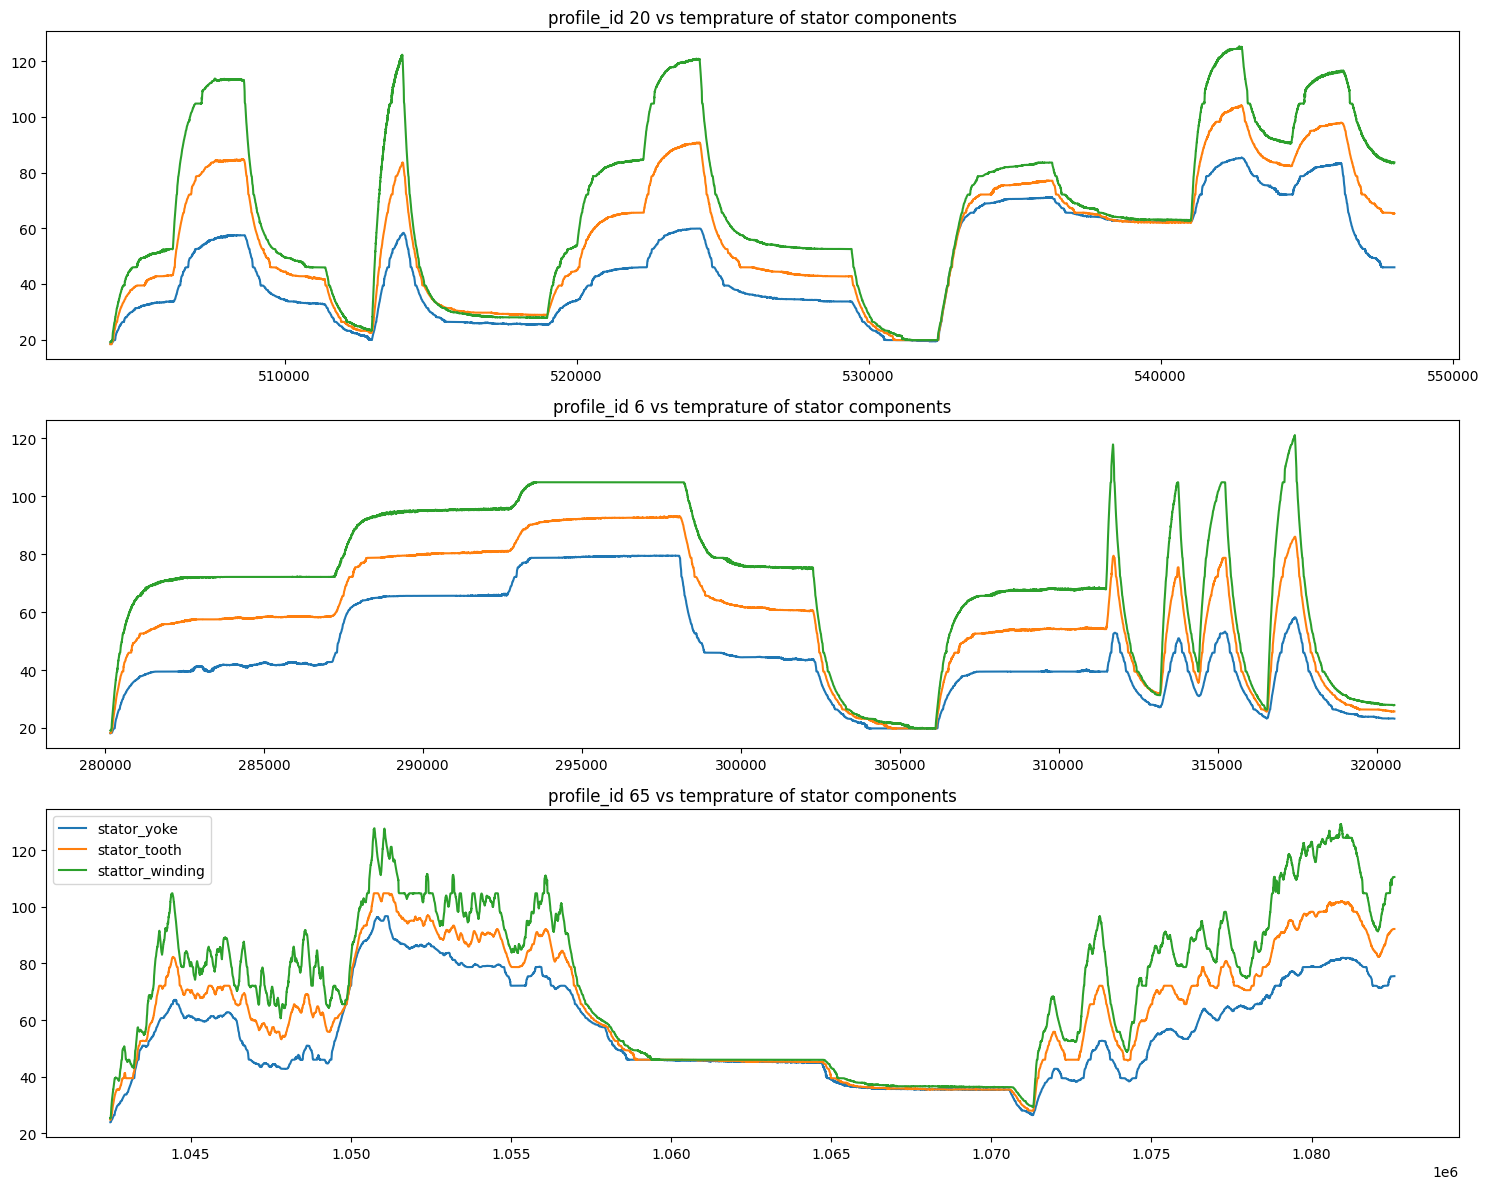

In [12]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

for i, id in enumerate([20, 6, 65]):
    axis[i].plot(Dataframe[Dataframe['profile_id'] == id]['stator_yoke'], label='stator_yoke')
    axis[i].plot(Dataframe[Dataframe['profile_id'] == id]['stator_tooth'], label='stator_tooth')
    axis[i].plot(Dataframe[Dataframe['profile_id'] == id]['stator_winding'], label='stattor_winding')
    axis[i].set_title(f"profile_id {id} vs temprature of stator components")
    
plt.tight_layout()
plt.legend()
plt.show()

## Descriptive Analysis

In [ ]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [ ]:
# Show full float values instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.10f' % x)
Dataframe.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000,1330816.0000000000
mean,54.2790045465,36.2299948401,66.3427453950,-25.1338093926,56.8785819968,2202.0807277890,-68.7168096186,37.4127823475,58.5067758506,48.1879648649,24.5652559521,31.1060323797,40.7930615502
std,44.1732335618,21.7861489734,28.6720608787,63.0919716010,22.9522330658,1859.6633503968,64.9332331921,92.1818796503,19.0014977140,19.9910039983,1.9295218592,77.1357548109,25.0454936774
min,-25.2909297943,10.6237512736,18.5858154297,-131.5304107666,18.1339759827,-275.5491441113,-278.0036315918,-293.4267929416,20.8569564819,18.0766887665,8.7834783440,-246.4666631891,2.0000000000
25%,12.0699248314,18.6981353760,42.7879569080,-78.6909040646,38.4160118103,317.1106647331,-115.4060599634,1.0958628470,43.1515820132,31.9903330803,23.1848044395,-0.1374265291,17.0000000000
50%,48.9381809235,26.9001408291,65.1101288795,-7.4297545442,56.0363454943,1999.9766845703,-51.0937629721,15.7740068436,60.2662870150,45.6255092411,24.7973267700,10.8603539467,43.0000000000
75%,90.0343929010,49.8574869235,88.1411371438,1.4702705443,75.5866817895,3760.6390583028,-2.9796881676,100.6121495121,72.0083710780,61.4608276338,26.2170190393,91.5971757664,65.0000000000
max,133.0369935104,101.5985120810,141.3628845215,131.4697875977,111.9464234139,6000.0151367188,0.0518967025,301.7078552246,113.6066284180,101.1479643648,30.7142047882,261.0057067871,81.0000000000
